<h1 style="text-align: center;"><font size="10">Loan Classification</font></h1>
<h3 style="text-align: center;"><font size="5">Machine Learning with Python Final Project</font></h3>

## Data Import
#### Initialize Environment

In [69]:
import pandas as pd
from IPython.display import display

#### Import Training Data

In [70]:
train_df = pd.read_csv("File:///Users/zhoufang/Documents/Projects/Notebooks/LoanDataProject/LoanDataProject/Data/loan_train.csv")

train_df.drop(train_df.columns[[0, 1]], axis = 1, inplace = True)
train_df = train_df.rename(columns = {'Principal' : 'principal', 'Gender' : 'gender'})
train_df['effective_date'] = pd.to_datetime(train_df['effective_date'])
train_df['due_date'] = pd.to_datetime(train_df['due_date'])
train_df['education'].replace(to_replace = ['High School or Below', 'Bechalor', 'Master or Above'], value = ['high school or below', 'bachelor', 'master or above'], inplace = True)

display(train_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,high school or below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,bachelor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#### Import Testing Data

In [71]:
test_df = pd.read_csv("File:///Users/zhoufang/Documents/Projects/Notebooks/LoanDataProject/LoanDataProject/Data/loan_test.csv")

test_df.drop(test_df.columns[[0, 1]], axis = 1, inplace = True)
test_df = test_df.rename(columns = {'Principal' : 'principal', 'Gender' : 'gender'})
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['education'].replace(to_replace = ['High School or Below', 'Bechalor', 'Master or Above'], value = ['high school or below', 'bachelor', 'master or above'], inplace = True)

display(test_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,bachelor,female
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,master or above,male
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,high school or below,female
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,bachelor,male


## K Nearest Neighbors Model Training
#### Initialize Environment

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

#### Encode Data

In [73]:
KNN_df = train_df.copy(deep = True)

KNN_df['gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)
KNN_df['education'].replace(to_replace = ['high school or below', 'college', 'bachelor', 'master or above'], value = [0, 1, 2, 3], inplace = True)

display(KNN_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,2,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,1,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,1,0


#### Pre-Process Data

In [74]:
KNN_df['eff_day_of_week'] = KNN_df['effective_date'].dt.dayofweek

KNN_df.drop(KNN_df.columns[[3, 4]], axis = 1, inplace = True)

KNN_df = KNN_df[['loan_status', 'principal', 'terms', 'eff_day_of_week', 'age', 'education', 'gender']]

display(KNN_df.head())

,loan_status,principal,terms,eff_day_of_week,age,education,gender
0,PAIDOFF,1000,30,3,45,0,0
1,PAIDOFF,1000,30,3,33,2,1
2,PAIDOFF,1000,15,3,27,1,0
3,PAIDOFF,1000,30,4,28,1,1
4,PAIDOFF,1000,30,4,29,1,0


#### Visualize Data

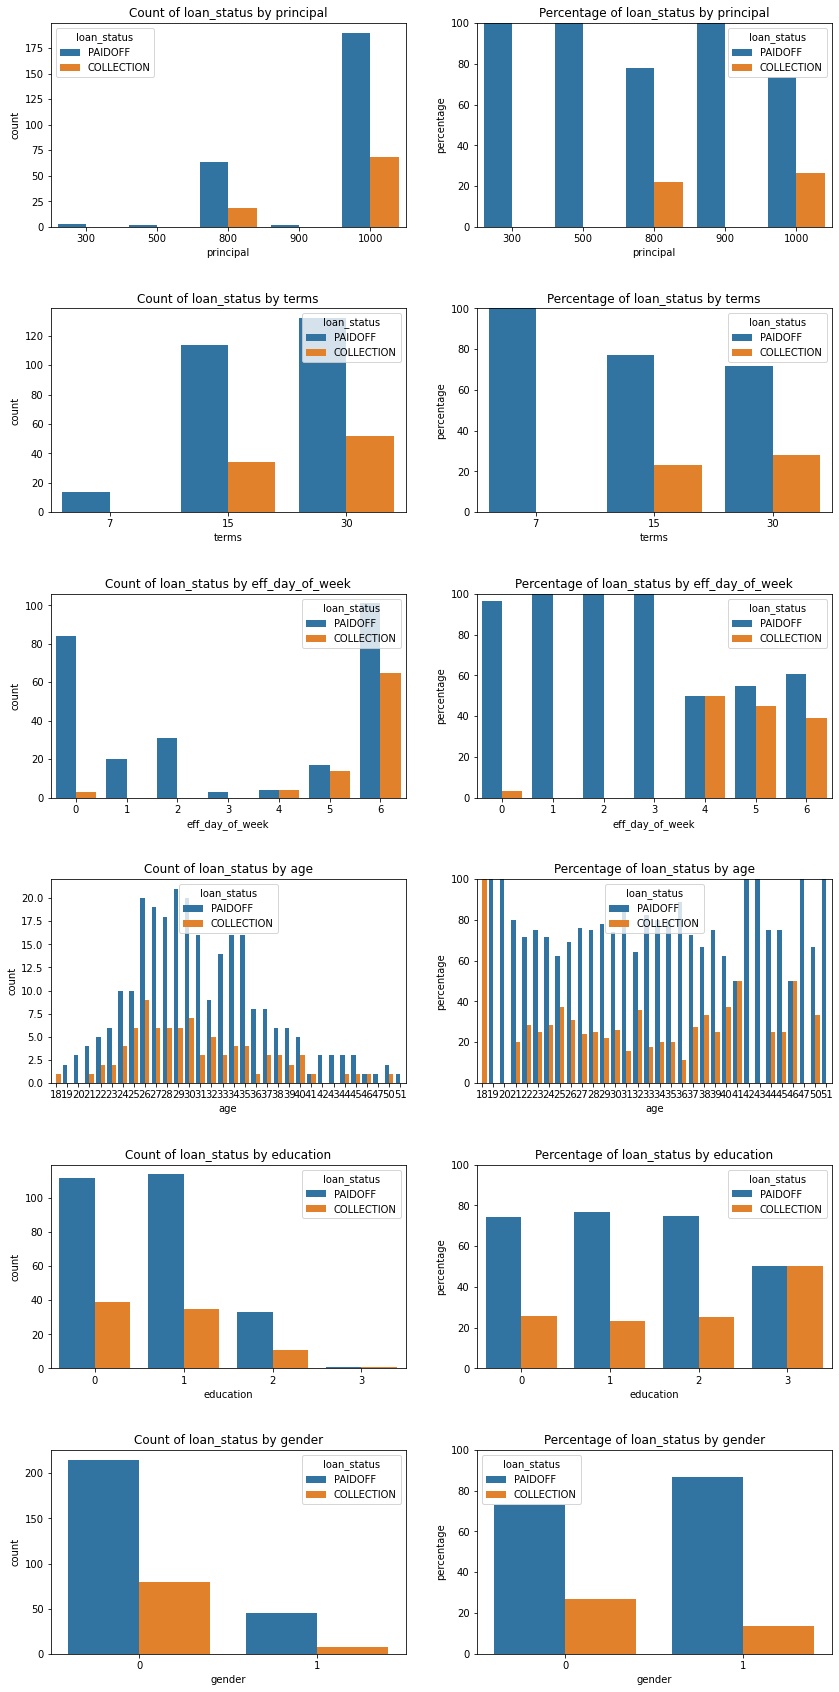

In [75]:
cols = 2
rows = len(KNN_df.columns) - 1
fig, ax = plt.subplots(rows, cols, figsize = [7 * cols, 5 * rows])

for i, col in enumerate(KNN_df.columns):
    if i == 0:
        continue
    row = i - 1
    sns.countplot(x = col, hue = 'loan_status', data = KNN_df, ax = ax[row, 0])
    sns.barplot(x = col, hue = 'loan_status', hue_order = ['PAIDOFF', 'COLLECTION'], y = 'percentage', data = KNN_df.groupby([col])['loan_status'].value_counts(normalize = True).rename('percentage').mul(100).reset_index().sort_values(col), ax = ax[row, 1])
    ax[row, 0].title.set_text("Count of loan_status by " + col)
    ax[row, 1].title.set_text("Percentage of loan_status by " + col)
    ax[row, 1].set(ylim = (0, 100))

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

#### Split Feature Target Splits

In [76]:
KNN_features_df = KNN_df[['principal', 'terms', 'eff_day_of_week', 'age', 'gender', 'education']]
KNN_features = preprocessing.StandardScaler().fit(KNN_features_df).transform(KNN_features_df)
KNN_features_df = pd.DataFrame(KNN_features)
KNN_features_df.set_axis(['principal', 'terms', 'eff_day_of_week', 'age', 'gender', 'education'], axis = 1, inplace = True)

KNN_target = KNN_df['loan_status']
KNN_target_df = pd.DataFrame(KNN_target)
KNN_target_df.set_axis(['loan_status'], axis = 1, inplace = True)

print("Features:")
display(KNN_features_df.head())
print()
print("Target:")
display(KNN_target_df.head())

Features:


,principal,terms,eff_day_of_week,age,gender,education
0,0.515785,0.920718,-0.261221,2.331526,-0.420560,-0.995125
1,0.515785,0.920718,-0.261221,0.341701,2.377782,1.838728
2,0.515785,-0.959111,-0.261221,-0.653211,-0.420560,0.421802
3,0.515785,0.920718,0.121755,-0.487392,2.377782,0.421802
4,0.515785,0.920718,0.121755,-0.321573,-0.420560,0.421802



Target:


,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


#### Split Test Train Sets

In [77]:
x_train, x_test, y_train, y_test = train_test_split(KNN_features, KNN_target, test_size = 0.2, random_state = 4)

print("Total Size    : " + str(len(KNN_df)))
print("Train Set Size: " + str(len(x_train)))
print("Test Set Size : " + str(len(x_test)))

Total Size    : 346
Train Set Size: 276
Test Set Size : 70


#### Optimize K

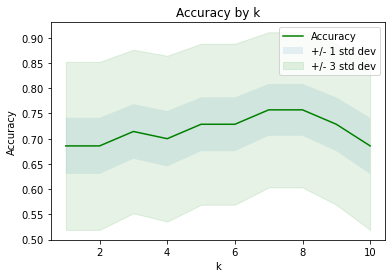

The highest accuracy of 0.7571428571428571 resulted from k of 7


In [78]:
num_ks = 10
mean_accs = np.zeros(num_ks)
std_devs = np.zeros(num_ks)

for k in range(1, num_ks + 1):
    model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y_hat = model.predict(x_test)
    mean_accs[k - 1] = accuracy_score(y_test, y_hat)
    std_devs[k - 1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

plt.plot(range(1, num_ks + 1), mean_accs, 'g')
plt.fill_between(range(1, num_ks + 1), mean_accs - 1 * std_devs, mean_accs + 1 * std_devs, alpha = 0.1)
plt.fill_between(range(1, num_ks + 1), mean_accs - 3 * std_devs, mean_accs + 3 * std_devs, alpha = 0.1, color = 'green')

plt.title('Accuracy by k')
plt.legend(('Accuracy', '+/- 1 std dev', '+/- 3 std dev'))
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.show()

k_optimal = mean_accs.argmax() + 1
print("The highest accuracy of", mean_accs.max(), "resulted from k of", k_optimal)

#### Fit Optimal Model

In [79]:
KNN_model = KNeighborsClassifier(n_neighbors = k_optimal).fit(KNN_features, KNN_target)

Note: different random_state values used for train_test_split will produce different k_optimal values. To circumvent this, k-fold cross validation may be used to stabilize k, as the effect of the duplicate values from bootstrapping may be magnified by KNN. This is room for improvement for future builds.

## K Nearest Neighbors Model Evaluation
#### Initialize Environment

In [80]:
from sklearn.metrics import jaccard_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Encode Data

In [81]:
KNN_eval_df = test_df.copy(deep = True)

KNN_eval_df['gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)
KNN_eval_df['education'].replace(to_replace = ['high school or below', 'college', 'bachelor', 'master or above'], value = [0, 1, 2, 3], inplace = True)

display(KNN_eval_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,2,1
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,3,0
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,0,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,1,0
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,2,0


#### Pre-Process Data

In [82]:
KNN_eval_df['eff_day_of_week'] = KNN_eval_df['effective_date'].dt.dayofweek

KNN_eval_df.drop(KNN_eval_df.columns[[3, 4]], axis = 1, inplace = True)

KNN_eval_df = KNN_eval_df[['loan_status', 'principal', 'terms', 'eff_day_of_week', 'age', 'education', 'gender']]

display(KNN_eval_df.head())

,loan_status,principal,terms,eff_day_of_week,age,education,gender
0,PAIDOFF,1000,30,3,50,2,1
1,PAIDOFF,300,7,4,35,3,0
2,PAIDOFF,1000,30,5,43,0,1
3,PAIDOFF,1000,30,5,26,1,0
4,PAIDOFF,800,15,6,29,2,0


#### Split Feature Target Sets

In [83]:
KNN_eval_features_df = KNN_eval_df[['principal', 'terms', 'eff_day_of_week', 'age', 'gender', 'education']]
KNN_eval_features = preprocessing.StandardScaler().fit(KNN_eval_features_df).transform(KNN_eval_features_df)
KNN_eval_features_df = pd.DataFrame(KNN_eval_features)
KNN_eval_features_df.set_axis(['principal', 'terms', 'eff_day_of_week', 'age', 'gender', 'education'], axis = 1, inplace = True)

KNN_eval_target = KNN_eval_df['loan_status']
KNN_eval_target_df = pd.DataFrame(KNN_eval_target)
KNN_eval_target_df.set_axis(['loan_status'], axis = 1, inplace = True)

print("Features:")
display(KNN_eval_features_df.head())
print()
print("Target:")
display(KNN_eval_target_df.head())

Features:


,principal,terms,eff_day_of_week,age,gender,education
0,0.493626,0.928450,-0.286740,3.059819,1.977142,1.438896
1,-3.562691,-1.704277,0.100359,0.533363,-0.505781,2.672236
2,0.493626,0.928450,0.487458,1.880806,1.977142,-1.027783
3,0.493626,0.928450,0.487458,-0.982511,-0.505781,0.205557
4,-0.665322,-0.788546,0.874558,-0.477219,-0.505781,1.438896



Target:


,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


#### Predict with KNN Model

In [84]:
KNN_eval_predict = KNN_model.predict(KNN_eval_features)

KNN_eval_predict_df = pd.DataFrame(KNN_eval_predict)
KNN_eval_predict_df.set_axis(['predicted_loan_status'], axis = 1, inplace = True)

display(KNN_eval_predict_df.head())

,predicted_loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,COLLECTION
4,PAIDOFF


#### Visualize Confusion Matrix

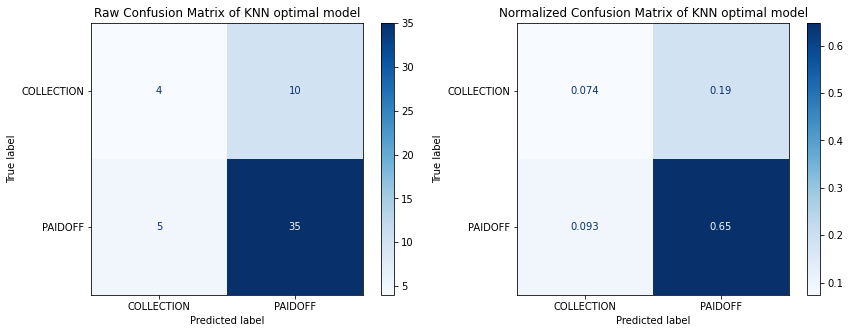

In [85]:
fig, ax = plt.subplots(1, 2, figsize = [7 * 2, 5 * 1])

KNN_cm = confusion_matrix(KNN_eval_target, KNN_eval_predict, labels = KNN_model.classes_)
KNN_cm_disp = ConfusionMatrixDisplay(confusion_matrix = KNN_cm, display_labels = KNN_model.classes_)
KNN_cm_disp.plot(ax = ax[0], cmap = plt.cm.Blues)
ax[0].title.set_text("Raw Confusion Matrix of KNN optimal model")

KNN_cm_normalized = confusion_matrix(KNN_eval_target, KNN_eval_predict, normalize = 'all', labels = KNN_model.classes_)
KNN_cm_normalized_disp = ConfusionMatrixDisplay(confusion_matrix = KNN_cm_normalized, display_labels = KNN_model.classes_)
KNN_cm_normalized_disp.plot(ax = ax[1], cmap = plt.cm.Blues)
ax[1].title.set_text("Normalized Confusion Matrix of KNN optimal model")

plt.subplots_adjust(wspace = 0.2)
plt.show()

#### Initialize Accuracy Scores Table

In [86]:
acc_scores = np.full((4, 3), np.nan)
acc_scores_df = pd.DataFrame(acc_scores)

acc_scores_df.set_axis(['jaccard_score', 'f1_score', 'log_loss'], axis = 1, inplace = True)
acc_scores_df.set_axis(['knn', 'decision_tree', 'svm', 'logistic_regression'], axis = 0, inplace = True)

display(acc_scores_df)

,jaccard_score,f1_score,log_loss
knn,NaN,NaN,NaN
decision_tree,NaN,NaN,NaN
svm,NaN,NaN,NaN
logistic_regression,NaN,NaN,NaN


#### Evaluate KNN Model Accuracy Scores

In [87]:
acc_scores_df['jaccard_score']['knn'] = jaccard_score(KNN_eval_target, KNN_eval_predict, pos_label = 'PAIDOFF')
acc_scores_df['f1_score']['knn'] = f1_score(KNN_eval_target, KNN_eval_predict, average = 'weighted')
display(acc_scores_df)

,jaccard_score,f1_score,log_loss
knn,0.7,0.700199,NaN
decision_tree,NaN,NaN,NaN
svm,NaN,NaN,NaN
logistic_regression,NaN,NaN,NaN


#### Display Classification Report

In [88]:
print(classification_report(KNN_eval_target, KNN_eval_predict))

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

    accuracy                           0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54



Note: although various random_states resulted in different k_optimal values, the overall accuracy did not seem to differ much.

## Decision Tree Model Training
#### Initialize Environment

In [89]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

#### Encode Data

In [90]:
tree_df = train_df.copy(deep = True)

tree_df['gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)
tree_df['education'].replace(to_replace = ['high school or below', 'college', 'bachelor', 'master or above'], value = [0, 1, 2, 3], inplace = True)

display(tree_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,2,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,1,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,1,0


#### Pre-Process Data

In [91]:
tree_df['eff_mid_week'] = tree_df['effective_date'].dt.dayofweek.apply(lambda x: 1 if (abs(x - 2) <= 1) else 0)
tree_df['education'].replace(to_replace = [3], value = [2], inplace = True)

tree_df.drop(tree_df.columns[[3, 4]], axis = 1, inplace = True)

tree_df = tree_df[['loan_status', 'principal', 'terms', 'eff_mid_week', 'age', 'education', 'gender']]

display(tree_df.head())

,loan_status,principal,terms,eff_mid_week,age,education,gender
0,PAIDOFF,1000,30,1,45,0,0
1,PAIDOFF,1000,30,1,33,2,1
2,PAIDOFF,1000,15,1,27,1,0
3,PAIDOFF,1000,30,0,28,1,1
4,PAIDOFF,1000,30,0,29,1,0


#### Visualize Data

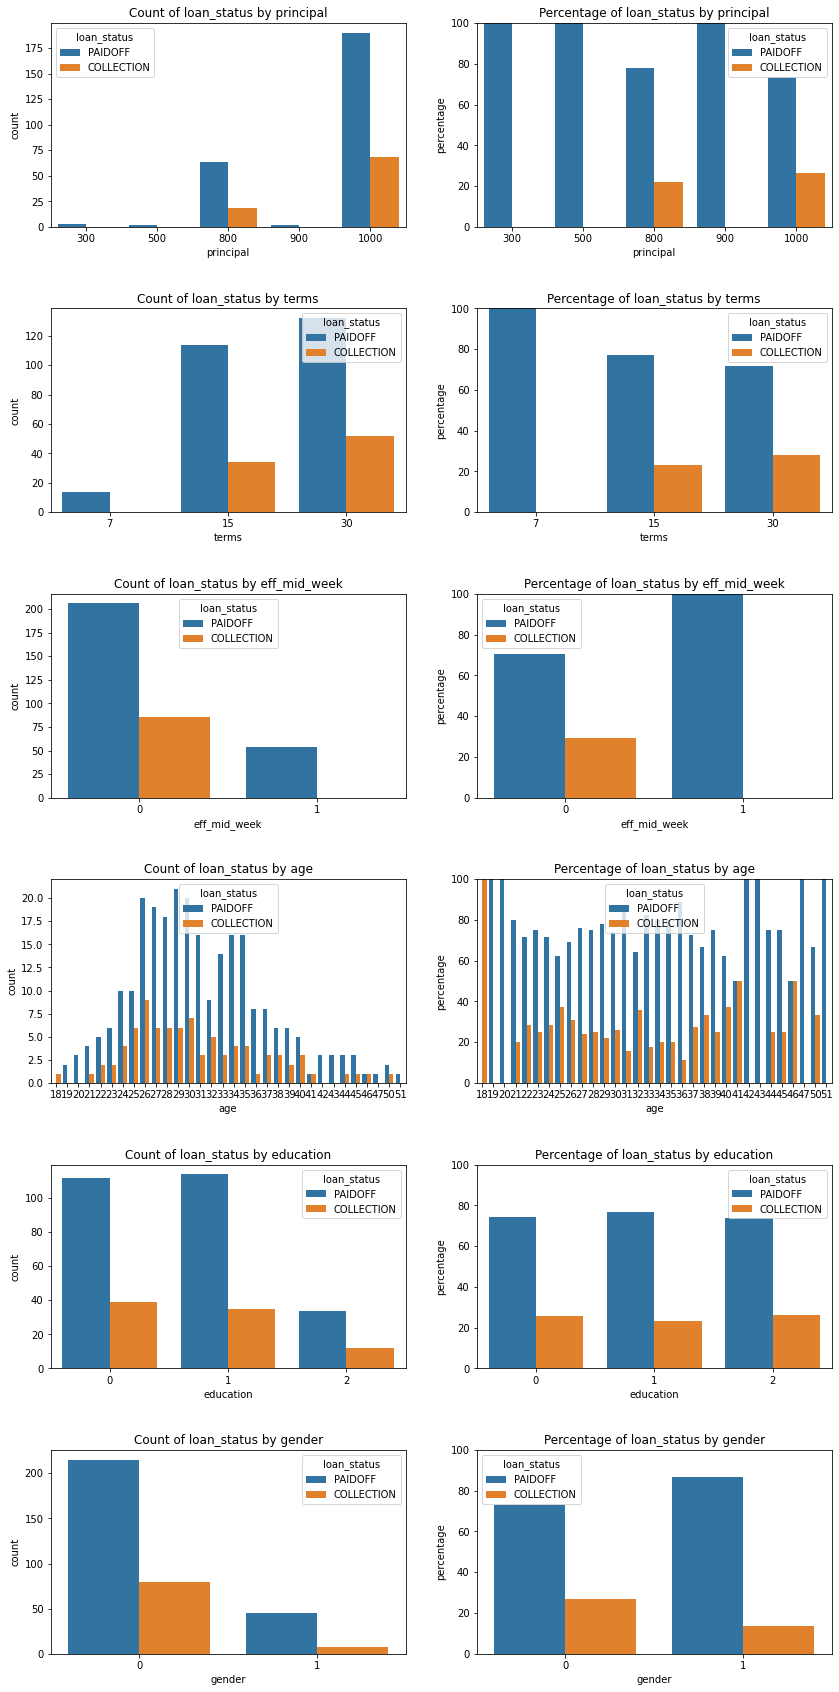

In [92]:
cols = 2
rows = len(tree_df.columns) - 1
fig, ax = plt.subplots(rows, cols, figsize = [7 * cols, 5 * rows])

for i, col in enumerate(tree_df.columns):
    if i == 0:
        continue
    row = i - 1
    sns.countplot(x = col, hue = 'loan_status', data = tree_df, ax = ax[row, 0])
    sns.barplot(x = col, hue = 'loan_status', hue_order = ['PAIDOFF', 'COLLECTION'], y = 'percentage', data = tree_df.groupby([col])['loan_status'].value_counts(normalize = True).rename('percentage').mul(100).reset_index().sort_values(col), ax = ax[row, 1])
    ax[row, 0].title.set_text("Count of loan_status by " + col)
    ax[row, 1].title.set_text("Percentage of loan_status by " + col)
    ax[row, 1].set(ylim = (0, 100))

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

#### Split Feature Target Sets

In [93]:
tree_features_df = tree_df[['principal', 'terms', 'eff_mid_week', 'age', 'gender', 'education']]
tree_features_df.set_axis(['principal', 'terms', 'eff_mid_week', 'age', 'gender', 'education'], axis = 1, inplace = True)

tree_target = tree_df['loan_status']
tree_target_df = pd.DataFrame(tree_target)
tree_target_df.set_axis(['loan_status'], axis = 1, inplace = True)

print("Features:")
display(tree_features_df.head())
print()
print("Target:")
display(tree_target_df.head())

Features:


,principal,terms,eff_mid_week,age,gender,education
0,1000,30,1,45,0,0
1,1000,30,1,33,1,2
2,1000,15,1,27,0,1
3,1000,30,0,28,1,1
4,1000,30,0,29,0,1



Target:


,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


#### Fit Decision Tree Model

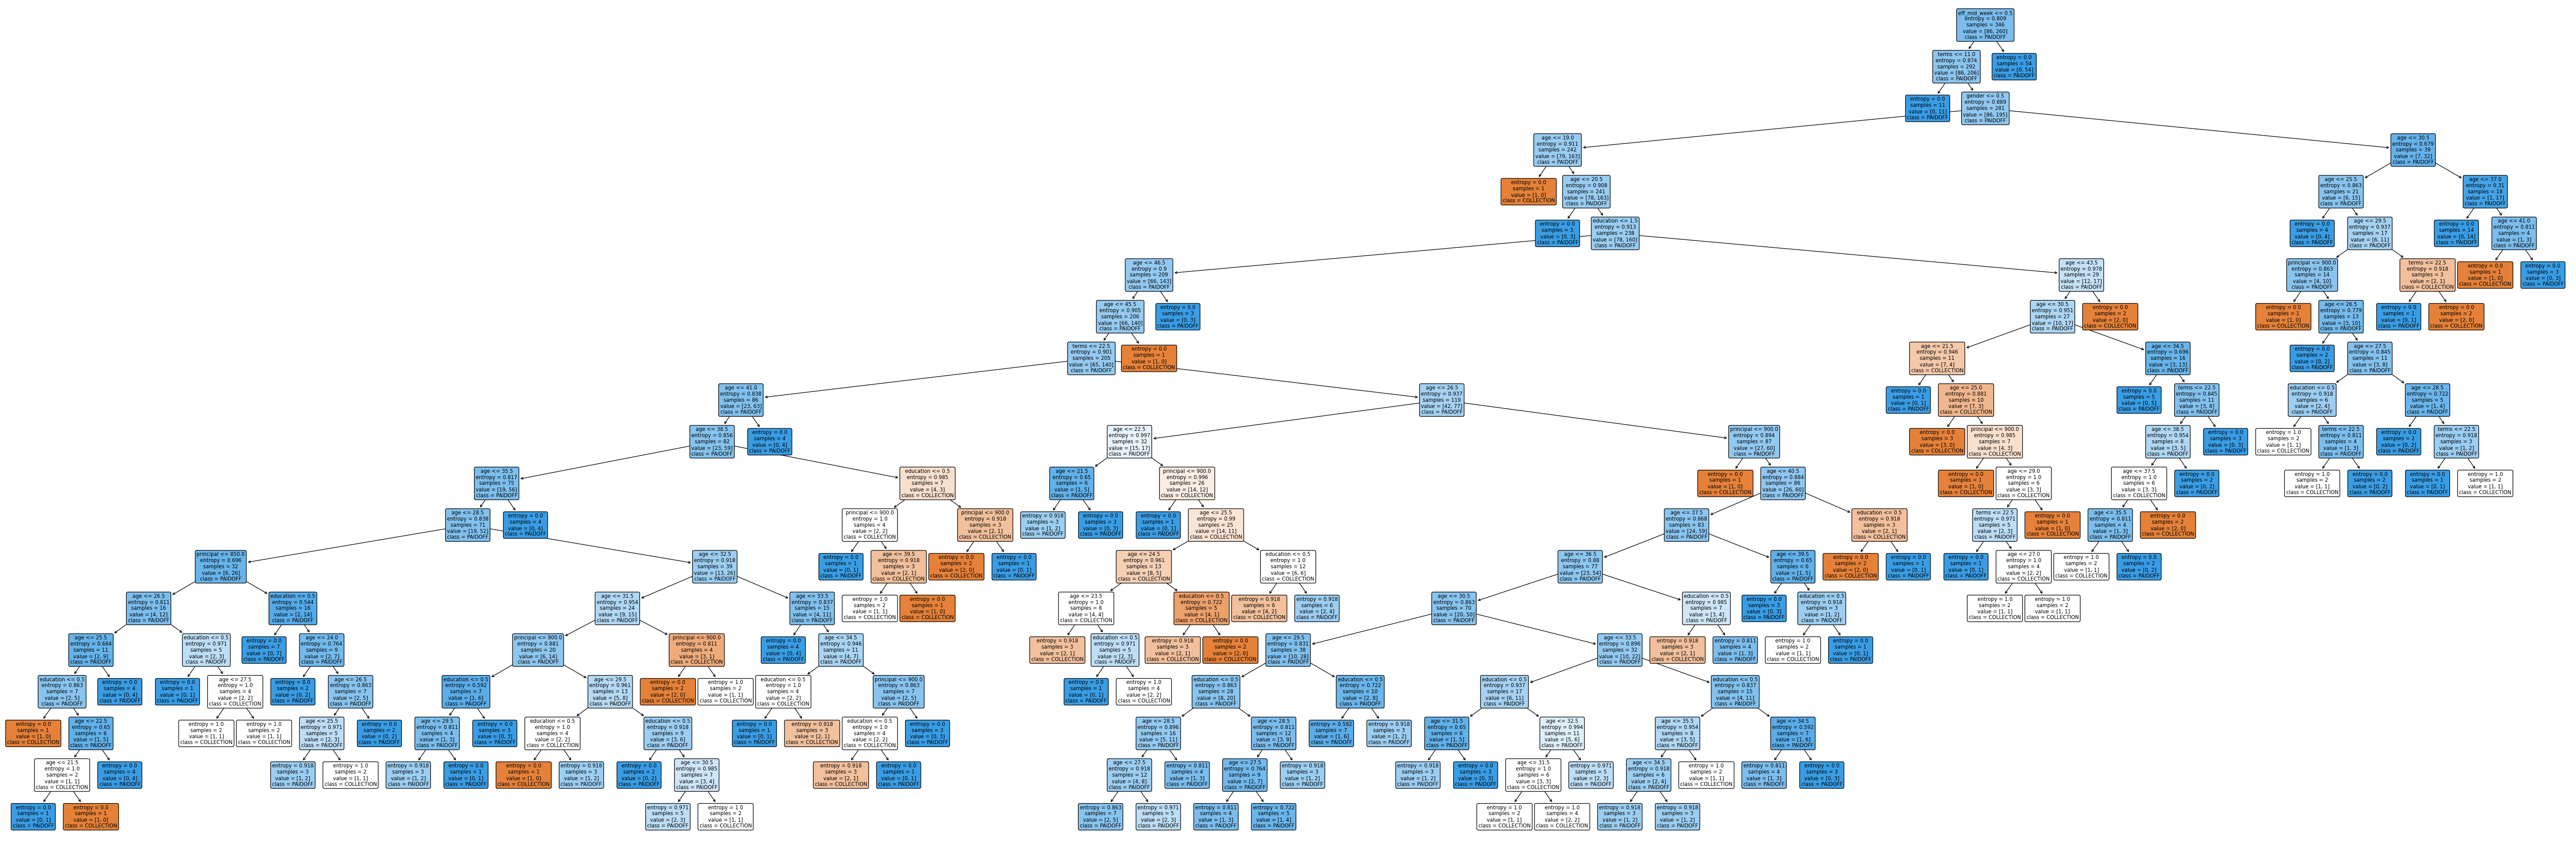

In [94]:
tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(tree_features_df, tree_target_df)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (75, 25), dpi = 100)

tree.plot_tree(tree_model, feature_names = tree_features_df.columns, class_names = tree_model.classes_, filled = True, rounded = True)
plt.show()

Note: The low sample size at some levels of continuous variables such as principal and age may skew the model and cause tree complexity and overfitting

## Decision Tree Model Evaluation
#### Encode Data

In [95]:
tree_eval_df = test_df.copy(deep = True)

tree_eval_df['gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)
tree_eval_df['education'].replace(to_replace = ['high school or below', 'college', 'bachelor', 'master or above'], value = [0, 1, 2, 3], inplace = True)

display(tree_eval_df.head())

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,2,1
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,3,0
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,0,1
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,1,0
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,2,0


#### Pre-Process Data

In [96]:
tree_eval_df['eff_mid_week'] = tree_eval_df['effective_date'].dt.dayofweek.apply(lambda x: 1 if (abs(x - 2) <= 1) else 0)
tree_eval_df['education'].replace(to_replace = [3], value = [2], inplace = True)

tree_eval_df.drop(tree_eval_df.columns[[3, 4]], axis = 1, inplace = True)

tree_eval_df = tree_eval_df[['loan_status', 'principal', 'terms', 'eff_mid_week', 'age', 'education', 'gender']]

display(tree_eval_df.head())

,loan_status,principal,terms,eff_mid_week,age,education,gender
0,PAIDOFF,1000,30,1,50,2,1
1,PAIDOFF,300,7,0,35,2,0
2,PAIDOFF,1000,30,0,43,0,1
3,PAIDOFF,1000,30,0,26,1,0
4,PAIDOFF,800,15,0,29,2,0


#### Split Feature Target Sets

In [97]:
tree_eval_features_df = tree_eval_df[['principal', 'terms', 'eff_mid_week', 'age', 'gender', 'education']]
tree_eval_features_df.set_axis(['principal', 'terms', 'eff_mid_week', 'age', 'gender', 'education'], axis = 1, inplace = True)

tree_eval_target = tree_eval_df['loan_status']
tree_eval_target_df = pd.DataFrame(tree_eval_target)
tree_eval_target_df.set_axis(['loan_status'], axis = 1, inplace = True)

print("Features:")
display(tree_eval_features_df.head())
print()
print("Target:")
display(tree_eval_target_df.head())

Features:


,principal,terms,eff_mid_week,age,gender,education
0,1000,30,1,50,1,2
1,300,7,0,35,0,2
2,1000,30,0,43,1,0
3,1000,30,0,26,0,1
4,800,15,0,29,0,2



Target:


,loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,PAIDOFF


#### Predict with Tree Model

In [98]:
tree_eval_predict = tree_model.predict(tree_eval_features_df)

tree_eval_predict_df = pd.DataFrame(tree_eval_predict)
tree_eval_predict_df.set_axis(['predicted_loan_status'], axis = 1, inplace = True)

display(tree_eval_predict_df.head())

,predicted_loan_status
0,PAIDOFF
1,PAIDOFF
2,PAIDOFF
3,PAIDOFF
4,COLLECTION


#### Visualize Confusion Matrix

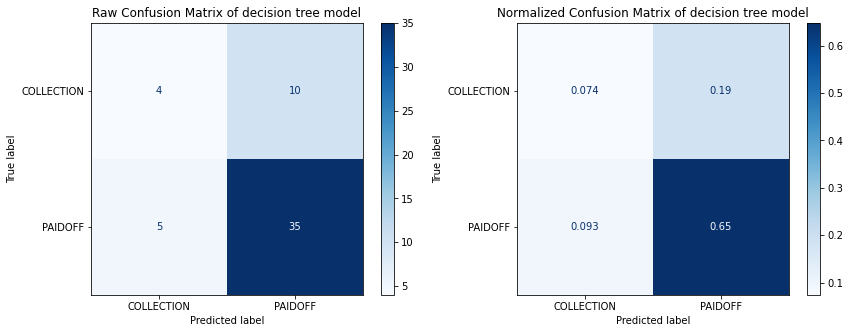

In [99]:
fig, ax = plt.subplots(1, 2, figsize = [7 * 2, 5 * 1])

tree_cm = confusion_matrix(tree_eval_target, tree_eval_predict, labels = tree_model.classes_)
tree_cm_disp = ConfusionMatrixDisplay(confusion_matrix = tree_cm, display_labels = tree_model.classes_)
tree_cm_disp.plot(ax = ax[0], cmap = plt.cm.Blues)
ax[0].title.set_text("Raw Confusion Matrix of decision tree model")

tree_cm_normalized = confusion_matrix(tree_eval_target, tree_eval_predict, normalize = 'all', labels = tree_model.classes_)
tree_cm_normalized_disp = ConfusionMatrixDisplay(confusion_matrix = tree_cm_normalized, display_labels = tree_model.classes_)
tree_cm_normalized_disp.plot(ax = ax[1], cmap = plt.cm.Blues)
ax[1].title.set_text("Normalized Confusion Matrix of decision tree model")

plt.subplots_adjust(wspace = 0.2)
plt.show()

#### Evaluate Decision Tree Model Accuracy Scores

In [100]:
acc_scores_df['jaccard_score']['decision_tree'] = jaccard_score(tree_eval_target, tree_eval_predict, pos_label = 'PAIDOFF')
acc_scores_df['f1_score']['decision_tree'] = f1_score(tree_eval_target, tree_eval_predict, average = 'weighted')
display(acc_scores_df)

,jaccard_score,f1_score,log_loss
knn,0.7,0.700199,NaN
decision_tree,0.7,0.700199,NaN
svm,NaN,NaN,NaN
logistic_regression,NaN,NaN,NaN


#### Display Classification Report

In [101]:
print(classification_report(tree_eval_target, tree_eval_predict))

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

    accuracy                           0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54



Note: Although decision tree model and k nearest neighbors model produced the same overall accuracy, the models made errors with different data points